# Project 2: Getting Proficient!
------------------------------------------------
**Dr. Dave Wanik - OPIM 5502: Big Data Analytics with Cloud Computing - University of Connecticut**



*   Your Group Number: 7
*   Your Group Members: Marco Nardone Guerra and Kumar Manav



The purpose of this project is to help you master the topics of:
* blending Python and SQL
* using pandas UDFs
* writing window functions

Some of the earlier questions will be relatively straight-foward, but the last question or two will have many different approaches available for you to use. Make sure you check your work and show that your approach actually did what you wanted it to do!

# Install Spark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Start a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Project2")\
        .getOrCreate()

In [ ]:
# some useful functions
import pyspark.sql.functions as F
import pyspark.sql.types as T

# Read the Data
We will use the GSOD dataset from Chapter 10.

In [ ]:
import gdown

gdown.download_folder('https://drive.google.com/drive/folders/1DCBWcE4Dt0UIZP0hRSfl0UpTf7hI68f1?usp=share_link')
gsod = spark.read.parquet('/content/gsod.parquet')

Retrieving folder list


Processing file 1y9k6Wnaxg0rJvJ5uZaUpRt-U-XxGtndS _SUCCESS
Processing file 1ZZqiDyW4zQY2B8FoUQXe6vxtjcWWPwCx .part-00000-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
Processing file 1lZ5y9Qb_6yfqJvbKA2FlVzfun8To2qkR .part-00001-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
Processing file 1gODKRUpBQt4nY5m7O9X1-XWwTNvzc30W .part-00002-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
Processing file 1-Hi473rQlAFKI-H0oZ2zz26KwRhFaBeQ .part-00003-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
Processing file 1TDKk1vMuCoPxBvatVVfxt0E6IsJXO87S part-00000-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet
Processing file 1EYi16_AarRaEWPCBPn7UNwd6-Y_7jp22 part-00001-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet
Processing file 1AFW1A1dtcEILE6UZP-cWx8h3TUabniPT part-00002-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet
Processing file 1YMgfD2c1alVNM09rIGOAUtAbd8lNiDYU part-00003-6ccefe44-8397-4020-b02f-832dd89c20

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1y9k6Wnaxg0rJvJ5uZaUpRt-U-XxGtndS
To: /content/gsod.parquet/_SUCCESS
0.00B [00:00, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1ZZqiDyW4zQY2B8FoUQXe6vxtjcWWPwCx
To: /content/gsod.parquet/.part-00000-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
100%|██████████| 207k/207k [00:00<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lZ5y9Qb_6yfqJvbKA2FlVzfun8To2qkR
To: /content/gsod.parquet/.part-00001-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
100%|██████████| 415k/415k [00:00<00:00, 31.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gODKRUpBQt4nY5m7O9X1-XWwTNvzc30W
To: /content/gsod.parquet/.part-00002-6ccefe44-8397-4020-b02f-832dd89c20a6-c000.snappy.parquet.crc
100%|██████████| 588k/588k [00:00<00:00, 93.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Hi473rQlAFKI-H0oZ2zz26KwRhFaBeQ
To:

In [ ]:
# rows and columns
# 12M rows and 32 columns
print(gsod.count(), len(gsod.columns))

12460217 32


In [ ]:
# schema
gsod.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: long (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: long (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: long (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: long (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: long (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: double (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: double (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: string (nullable =

In [ ]:
# look at the first few rows
gsod.show(10, truncate=False)

+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|917350|99999|2018|04 |21 |82.6|9         |9999.9|0         |1006.9|9        |993.2 |9        |999.9|0          |3.7 |9         |8.5  |999.9|85.5|*       |74.5|        |0.31|G        |999.9|0  |0           |0               

🙏 Good luck!

# 🔵 (30 pts, 5 pts each) Blending Python and SQL

In [ ]:
# create temp view
gsod.createOrReplaceTempView("gsod")

### Select all rows where `temp` is greater than 90 and where windspeed is greater than 20.

In [ ]:
gsod.where('temp > 90 and wdsp > 20').show()

+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|   stn| wban|year| mo| da| temp|count_temp|  dewp|count_dewp|   slp|count_slp|   stp|count_stp|visib|count_visib| wdsp|count_wdsp|mxpsd| gust|  max|flag_max| min|flag_min| prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+-----+----------+------+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|764990|99999|2018| 08| 26| 90.3|         9|  73.9|         9|1014.2|        9|1011.8|        9|  5.2|          9|999.9|         0|999.9|999.9|104.7|        |75.4|        |  0.0|        G|999.9|  0|           0|

### Print the count of rows and show first 10 rows to confirm your answer.

In [ ]:
print(gsod.count())
print(gsod.show(10, False))

12460217
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|stn   |wban |year|mo |da |temp|count_temp|dewp  |count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+------+----------+------+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+
|917350|99999|2018|04 |21 |82.6|9         |9999.9|0         |1006.9|9        |993.2 |9        |999.9|0          |3.7 |9         |8.5  |999.9|85.5|*       |74.5|        |0.31|G        |999.9|0  |0           |0      

### How many unique stations met the condition of temp>90 and wdsp>20?

In [ ]:
gsod.where('temp > 90 and wdsp > 20').select(F.countDistinct("stn")).show()

+-------------------+
|count(DISTINCT stn)|
+-------------------+
|                283|
+-------------------+



### Find the top 10 stations (`stn`) where the condition is true.

In [ ]:
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("stn").orderBy(*[F.desc(c) for c in ["wdsp","temp"]])

In [ ]:
gsod.where('temp > 90 and wdsp > 20').withColumn("rank", F.rank().over(windowSpec)).select("stn", "rank").groupBy('stn')\
.agg(F.avg("rank")).orderBy('avg(rank)').withColumnRenamed('avg(rank)', 'rank').show(10)

+------+----+
|   stn|rank|
+------+----+
|368700| 1.0|
|403600| 1.0|
|377870| 1.0|
|355220| 1.0|
|381110| 1.0|
|162600| 1.0|
|382021| 1.0|
|368210| 1.0|
|382620| 1.0|
|368060| 1.0|
+------+----+
only showing top 10 rows



### Where is the top station (that is not 999999)? 
Below is the list of all GSOD stations - Google the location and let me know where it is by writing your answer and embedding a picture!

**Top station is 368700**

Here is a list of all the GSOD stations:
* http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.GSOD/.MONTHLY/.Name/IWMO+exch+table-+text+text+skipanyNaN+-table+.html

ALMA-ATA, KAZAKH is a city in khazakastan It served as the country's capital until 1997 and remains Kazakhstan's trading and cultural hub.

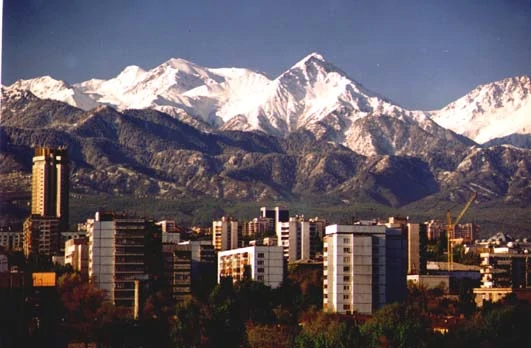

**Answer:** ABC is STATION XYZ - it is hot and windy there!

(embed a picture here from Google Images or Wikipedia)

### What month/year was the hottest and windiest at that particular station?

In [ ]:
windowSpec = Window.partitionBy(*['mo', 'year']).orderBy(*[F.desc(c) for c in ["wdsp","temp"]])

In [ ]:
gsod.where('temp > 90 and wdsp > 20 and stn = 368700').withColumn("rank", F.rank().over(windowSpec)).orderBy('rank', ascending = True).select('mo', 'year').show(1)

+---+----+
| mo|year|
+---+----+
| 07|2017|
+---+----+



# 🔵 (30 pts total, 10 pts each) Pandas UDFs

## Return summary statistics of the `temp` and `wdsp` columns and note the range of values.

Please show the count, min 25th, 50th, 75th percentile and max value.

In [ ]:
gsod.select(F.col('temp'),F.col('wdsp')).summary('count','min', '25%', '50%', '75%', 'max').show()

+-------+--------+--------+
|summary|    temp|    wdsp|
+-------+--------+--------+
|  count|12460217|12460217|
|    min|  -114.7|     0.0|
|    25%|    41.2|     3.5|
|    50%|    58.5|     5.6|
|    75%|    73.7|     8.7|
|    max|   110.0|   999.9|
+-------+--------+--------+



In [ ]:
# # warning: this may take a few mins to run!
# i've pasted output below

#+-------+--------+--------+
#|summary|    temp|    wdsp|
#+-------+--------+--------+
#|  count|12460217|12460217|
#|    min|  -114.7|     0.0|
#|    25%|    41.2|     3.5|
#|    75%|    73.7|     8.7|
#|    max|   110.0|   999.9|
#+-------+--------+--------+

It looks like there are some missing values for the wdsp column.

Review this metadata for the units of each column:
* https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.txt

```
TEMP - Mean temperature (.1 Fahrenheit)
DEWP - Mean dew point (.1 Fahrenheit)
SLP - Mean sea level pressure (.1 mb)
STP - Mean station pressure (.1 mb)
VISIB - Mean visibility (.1 miles)
WDSP – Mean wind speed (.1 knots)
MXSPD - Maximum sustained wind speed (.1 knots)
GUST - Maximum wind gust (.1 knots)
MAX - Maximum temperature (.1 Fahrenheit)
MIN - Minimum temperature (.1 Fahrenheit)
PRCP - Precipitation amount (.01 inches)
SNDP - Snow depth (.1 inches)
```



## Write a Pandas UDF that converts temperature from F to C
Use a decorator! You can hack the example in the book.

In [ ]:
import pyspark.sql.types as T

@F.udf(T.DoubleType())
def F_to_C(s: float) -> float:
  return (s-32)*(5/9)

Now add it as a column in `gsod`.

In [ ]:
gsod = gsod.withColumn("temp_C", F_to_C(F.col("temp")))
gsod.select("temp_C", "temp").show(5)

+------------------+----+
|            temp_C|temp|
+------------------+----+
| 28.11111111111111|82.6|
|18.333333333333336|65.0|
|13.111111111111112|55.6|
|12.333333333333336|54.2|
|29.000000000000004|84.2|
+------------------+----+
only showing top 5 rows



## Write a Pandas UDF that converts `WDSP` from knots to m/s

Be careful - I think there are missing values coded as 999 - make these rows the number 0 instead of 999 and convert to a numeric data type.

In [ ]:
gsod = gsod.withColumn("wdsp", gsod.wdsp.cast(T.DoubleType()))

@F.udf(T.DoubleType())
def null_filter(s: float) -> float:
  if s == 999:
    return 0
  return s

gsod = gsod.withColumn("wdsp", null_filter(F.col("wdsp")))

Write a pandas UDF to convert `wdsp` from knots to meters per second.

In [ ]:
@F.udf(T.DoubleType())
def knots_to_m(s: float) -> float:
  return s*0.51444

Now apply the pandas UDF to the `wdsp` column.

In [ ]:
gsod = gsod.withColumn("wdsp_ms", knots_to_m(F.col("wdsp")))
gsod.select("wdsp", "wdsp_ms").show(5)

+----+------------------+
|wdsp|           wdsp_ms|
+----+------------------+
| 3.7|1.9034280000000001|
| 4.6|          2.366424|
| 5.1|2.6236439999999996|
| 9.3| 4.784292000000001|
|15.1|          7.768044|
+----+------------------+
only showing top 5 rows



# 🔵 (20 pts total, 10 pts each) Window Functions

## Station Quality

In [ ]:
# these are the total number of stations - 12k
print('These are the counts of all stations:', gsod.select('stn').distinct().count())
# look at stations with sparse data quality - 9.9k
tmp = gsod.groupby('stn').count().orderBy('count')
# let's keep stations that have 300*3 = 900 observations
tmp = tmp.where(f'count > 900').select('stn', 'count')
print('These are the counts of stations with decent data quality:', tmp.distinct().count())
tmp.show()

These are the counts of all stations: 12832
These are the counts of stations with decent data quality: 9963
+------+-----+
|   stn|count|
+------+-----+
|760400|  901|
|627900|  901|
|943930|  902|
|718433|  902|
|368710|  903|
|014650|  903|
|817520|  903|
|717360|  903|
|817880|  904|
|719043|  904|
|423720|  904|
|618560|  905|
|722363|  905|
|703333|  905|
|724856|  905|
|368830|  905|
|268500|  905|
|272230|  905|
|160360|  905|
|819090|  906|
+------+-----+
only showing top 20 rows



In [ ]:
# make a plot of those stations with good data quality
import matplotlib.pyplot as plt
import pandas as pd

tmp = tmp.toPandas()
tmp.describe()

,count
count,9963.000000
mean,1105.040149
std,3123.529808
min,901.000000
25%,1076.000000
50%,1085.000000
75%,1086.000000
max,312826.000000


In [ ]:
tmp = tmp.sort_values('count', ascending=False).iloc[1:].head(21)

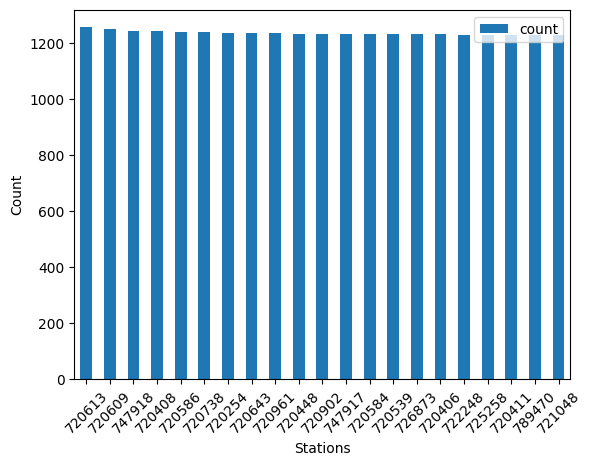

In [ ]:
tmp.plot.bar('stn','count')
plt.xlabel("Stations")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

## Rolling Averages

Read this:
* https://stackoverflow.com/questions/45806194/pyspark-rolling-average-using-timeseries-data

...decide which answer is closest to our GSOD dataset, and decide if you need to use rowBetween and rangeBetween! Remember your data is in daily data right now and that you may not have a perfect of observations each day.

First, hack listing 10.20 in the book and create a unix timestep column.

In [ ]:
gsod = (
    gsod.withColumn(
        "dt",
        F.to_date(
            F.concat_ws("-", F.col("year"), F.col("mo"), F.col("da"))
        ),
    )
    .withColumn("dt_num", F.unix_timestamp("dt"))
)

Now select one station for demonstation purposes - let's just use `stn == 406370` for demo purposes.

In [ ]:
gsod.where(F.col("stn") == 406370).show(10, False)

+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------------+----------+----------+----------+
|stn   |wban |year|mo |da |temp |count_temp|dewp|count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp |count_wdsp|mxpsd|gust |max  |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|temp_C            |wdsp_ms   |dt        |dt_num    |
+------+-----+----+---+---+-----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+-----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------------+----------+----------+----------+
|406370|99999|2018|12 |24 |52.4 |4         |44.4|4         |1022

Convert this data sample toPandas() and make a nice line plot of `temp` vs. date. Remember to convert the date to a datetime and then set the index as the date column in order to get a nice looking graph.

In [ ]:
import pandas as pd

In [ ]:
gsod_window = gsod.where(F.col("stn") == 406370)
gsod_window_pd = gsod.where(F.col("stn") == 406370).toPandas()

In [ ]:
gsod_window_pd['temp'] = pd.to_numeric(gsod_window_pd['temp'])
gsod_window_pd['dt'] = pd.to_datetime(gsod_window_pd['dt'])

<Axes: xlabel='dt'>

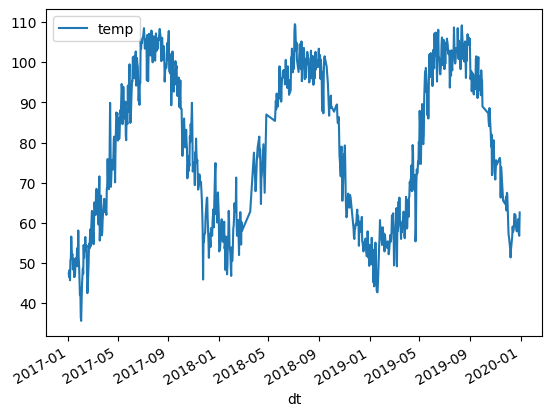

In [ ]:
gsod_window_pd.plot('dt', 'temp')

Check to make sure there are no missing values in the `temp` column.

In [ ]:
gsod_window.select(F.count(F.when(F.isnan(F.col('temp')) | F.col('temp').isNull(), F.col('temp'))).alias("temp")).show()

+----+
|temp|
+----+
|   0|
+----+



Check out the data quality of April 2018 and show 30 rows for this station. Make a comment about the data quality.

In [ ]:
gsod_window.where("mo == '04' and year == '2018'").show(30, False)

+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------------+------------------+----------+----------+
|stn   |wban |year|mo |da |temp|count_temp|dewp|count_dewp|slp   |count_slp|stp   |count_stp|visib|count_visib|wdsp |count_wdsp|mxpsd|gust |max |flag_max|min |flag_min|prcp|flag_prcp|sndp |fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|temp_C            |wdsp_ms           |dt        |dt_num    |
+------+-----+----+---+---+----+----------+----+----------+------+---------+------+---------+-----+-----------+-----+----------+-----+-----+----+--------+----+--------+----+---------+-----+---+------------+----------------+----+-------+--------------------+------------------+------------------+----------+----------+
|406370|99999|2018|04 |09 |81.5|4         |58.

Good data quality, only comment that can be offered is on many of the columns having the same values throughout the month and little variation.

Create the window function for a 3 day rolling temperature (remember - time matters!) The window should be composed of today, yesterday, and two days ago. 

**Note:** The example from the book is not directly applicable here - make sure you check your work and work out some of the math to confirm your rolling window function did what it was supposed to do!

In [ ]:
from pyspark.sql.window import Window

# convert dt to timestamp
gsod_window = gsod_window.withColumn('dt', F.col('dt').cast('timestamp'))

# function that calculates number of days in timestamp datatype
days = lambda i: i * 86400

# window funct
window_spec = Window.orderBy(gsod_window.dt.cast('long')).rangeBetween(-days(3), 0)

# apply window function and calculate rolling average of temp
rolling_temp = F.avg(gsod_window.temp).over(window_spec)

# add column
gsod_window = gsod_window.withColumn("rolling_temp", rolling_temp)

# show temp, rollingtemp
gsod_window.select("temp", "rolling_temp").show(10, False)

+----+------------------+
|temp|rolling_temp      |
+----+------------------+
|47.4|47.4              |
|46.5|46.95             |
|48.3|47.4              |
|45.7|46.974999999999994|
|50.8|47.825            |
|51.0|48.95             |
|56.6|51.025            |
|53.3|52.925            |
|51.9|53.199999999999996|
|52.2|53.5              |
+----+------------------+
only showing top 10 rows



Make a line plot with the raw temperature value (in blue) and the rolling window temperature value (in orange).

In [ ]:
# convert back to pandas
gsod_window = (gsod_window.select('temp', 'rolling_temp', 'dt')).toPandas()

<Axes: xlabel='dt'>

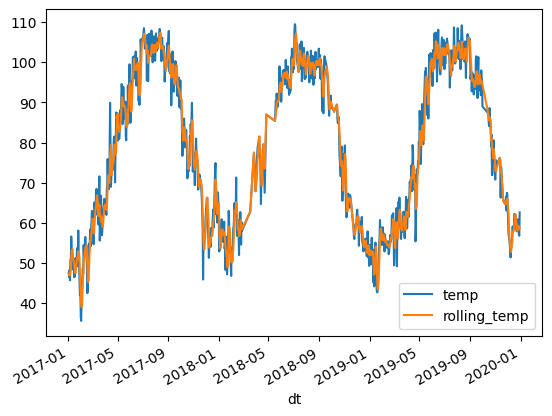

In [ ]:
gsod_window['dt'] = pd.to_datetime(gsod_window['dt'])

gsod_window.plot(x = 'dt', y = ['temp', 'rolling_temp'])

# 🔵 (20 pts total) Pandas UDFs and/or Window Functions

This is probably the hardest part of the project - spend some time on this and try a few different approaches if needed! I recommend just using a single station with all observations - how about station 406370? 

## Consecutive Values Above Threshold
I would like a new column in the PySpark DataFrame that contains the maximum consecutive values above a threshold (>=90 degF).

If the raw values are [91, 89, 88, 93, 94, 101, 85], then the output should be [1, 0, 0, 1, 2, 3, 0]. You are summing cumulative logical values!

Read this:
* https://stackoverflow.com/questions/73121080/count-consecutive-numbers-from-a-column-of-a-dataframe-in-python
* https://datascience.stackexchange.com/questions/77644/count-the-max-number-of-consecutive-1-and-0-in-pandas-dataframe
* ... and Chapters 8, 9 and 10 in your book

Now go code it up!

In [ ]:
# getting the data for station 406370
consec = gsod.where(F.col('stn') == '406370').select(F.col('*'))

In [ ]:
# Create a window partitioned by station and ordered by date
windowspec = Window.partitionBy('stn').orderBy('dt')

# Created a new column 'above_threshold' which is 1 if temp >= 90 and 0 otherwise
consec = consec.withColumn('above_threshold', F.when(F.col('temp') >= 90, 1).otherwise(0))

In [ ]:
# converting dataframe to pandas
consec = consec.toPandas()

In [ ]:
# assigning a unique counter value to each consecutive sequence of identical values in the "temp" column
consec['counter'] = consec['temp'].diff().ne(0).cumsum()

In [ ]:
# finding the minimum value of the above_threshold column for each group of consecutive values
consec.groupby('counter')['above_threshold'].min()

counter
1      0
2      0
3      0
4      1
5      0
      ..
880    0
881    0
882    0
883    0
884    1
Name: above_threshold, Length: 884, dtype: int32

In [ ]:
# Calculate consecutive 1s
consec['consec_temp'] = consec.loc[consec['above_threshold'] == 1].groupby((consec['above_threshold'] != 1).cumsum()).cumcount() + 1
consec['consec_temp'] = consec['consec_temp'].where(consec['above_threshold'] == 1, '')
consec['consec_temp'] = consec['consec_temp'].replace('', '0')
consec['consec_temp'] = consec['consec_temp'].astype(int)

consec.head(60)

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,hail,thunder,tornado_funnel_cloud,temp_C,wdsp_ms,dt,dt_num,above_threshold,counter,consec_temp
0,406370,99999,2018,12,24,52.4,4,44.4,4,1022.9,...,0,0,0,11.333333,514.388556,2018-12-24,1545609600,0,1,0
1,406370,99999,2018,04,09,81.5,4,58.0,4,1010.7,...,0,0,0,27.500000,514.388556,2018-04-09,1523232000,0,2,0
2,406370,99999,2018,11,16,66.2,4,54.0,4,1016.2,...,0,0,0,19.000000,514.388556,2018-11-16,1542326400,0,3,0
3,406370,99999,2018,08,11,97.6,4,52.7,4,1001.1,...,0,0,0,36.444444,514.388556,2018-08-11,1533945600,1,4,1
4,406370,99999,2018,01,07,59.6,4,46.7,4,1020.6,...,0,0,0,15.333333,514.388556,2018-01-07,1515283200,0,5,0
5,406370,99999,2018,10,19,83.0,4,52.1,4,1013.8,...,0,0,0,28.333333,514.388556,2018-10-19,1539907200,0,6,0
6,406370,99999,2018,02,04,54.0,4,34.9,4,1022.1,...,0,0,0,12.222222,514.388556,2018-02-04,1517702400,0,7,0
7,406370,99999,2018,09,25,86.7,4,52.4,4,1008.3,...,0,0,0,30.388889,514.388556,2018-09-25,1537833600,0,8,0
8,406370,99999,2018,12,15,55.0,4,46.9,4,1025.1,...,0,0,0,12.777778,514.388556,2018-12-15,1544832000,0,9,0
9,406370,99999,2018,07,20,105.2,4,58.0,4,997.0,...,0,0,0,40.666667,514.388556,2018-07-20,1532044800,1,10,1


Check your answer on May 2018 for Station 406370 visually! Plot your raw temperature on one graph (as you see below) and plot your cumulative sum above a threshold on another graph. Then visually compare to make sure you solved it correctly. You can use a Pandas UDF only (hint: look at Chapters 8 and 9) and/or you can cleverly combine it with a Window function.

**CHECK YOUR WORK!!!**

In [ ]:
# this is the raw data for May 2018 at station 406370

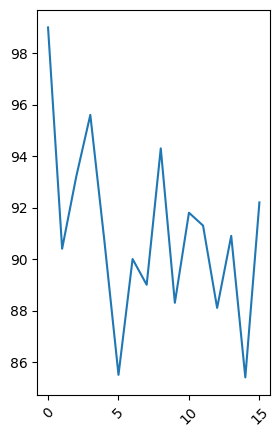

In [ ]:
gd = gsod.where( (F.col('mo') == '05') &(F.col('year') =='2018') &  (F.col('stn')=='406370') ).select('*')

gd =  gd.toPandas()

gd.shape

import matplotlib.pyplot as plt
import pandas as pd

gd['temp'].plot(figsize = (3,5))
plt.xticks(rotation = 45)
plt.show()

No need to apply to all stations in GSOD if it takes too long - just use your sample from stn == 406370.